In [0]:

from fastai.vision import *

**LIST OF URLs**
  

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute
('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
wiindow.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n'))); 



**Search and scroll**
Go to Google Images and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

**Download**

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

In [0]:

folder = 'downs'

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path = '/content/drive/My Drive/fastai/downs'


In [0]:
downs_file = path + '/downs.csv'

In [0]:
healthy_human_file = '/content/drive/My Drive/fastai/downs/healthy_human.csv'

In [0]:
path = Path ('data/d')

In [0]:
folder_d = 'downs'
folder_h = 'healthy_human'

In [0]:
d_d = path/folder_d

In [0]:
d_h = path/folder_h

In [0]:

d_d.mkdir(parents=True, exist_ok=True)
d_h.mkdir(parents=True, exist_ok=True)

In [14]:

path.ls()

[PosixPath('data/d/healthy_human'), PosixPath('data/d/downs')]

In [0]:
classes = ['downs','healthy']

In [0]:
download_images(downs_file, d_d, max_pics=200)


In [0]:
download_images(healthy_human_file, d_h, max_pics=200)


In [0]:

# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [27]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

downs


healthy


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [29]:
data.classes

['downs', 'healthy_human']

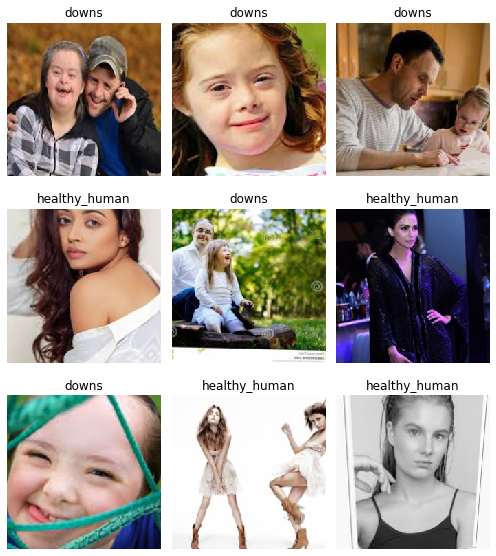

In [30]:

data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


In [31]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 86.4MB/s]


In [32]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.131101,0.309711,0.140625,00:06
1,0.676279,0.262406,0.078125,00:05
2,0.488043,0.286068,0.062500,00:04
3,0.425116,0.301718,0.046875,00:04


In [0]:
learn.save('stage-1')


In [0]:
learn.unfreeze()


In [35]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


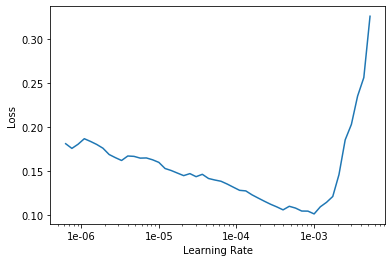

In [36]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(1, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.013756,0.360373,0.062500,00:05


In [0]:
learn.save('stage-2')


In [0]:
learn.load('stage-2');


In [43]:
interp = ClassificationInterpretation.from_learner(learn)


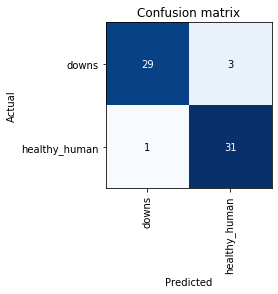

In [44]:
interp.plot_confusion_matrix()


In [0]:
from fastai.widgets import *


In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:

# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [49]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

In [50]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)


In [0]:
learn.export()


In [0]:
defaults.device = torch.device('cpu')


In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [0]:
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })